In [252]:
import numpy as np
from pathlib import Path
from astropy.io import fits
from astropy.table import Table, vstack, hstack, unique,join
import matplotlib.pyplot as plt
import pandas as pd
import sys

# sys.path.append("/global/u2/b/bid13/VI/prospect/py")

import desispec.coaddition
import desispec.io
import desispec.spectra
# from desitarget.cmx.cmx_targetmask import cmx_mask
from desitarget.sv1.sv1_targetmask import desi_mask
from prospect import utilities,plotframes, myspecselect, myspecupdate
from desispec.coaddition import coadd_cameras
from prospect import utilities ,plotframes
# from prospect_my import plotframes
from bokeh.plotting import figure, show, save
from bokeh.io import output_notebook
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
output_notebook()

from stack_spectra import _common_grid, _redshift
from speclite.redshift import redshift

Loading BokehJS ...

In [253]:
my_path = Path("/global/cscratch1/sd/bid13/stack-spectra")

In [261]:
spec = desispec.io.read_spectra(my_path /  "spectra_bright.fits")
zcat = Table.read(my_path / "zcat_bright.fits")
flux = spec.flux['r']
wl = spec.wave['r']
ivar = spec.ivar['r']

INFO:spectra.py:253:read_spectra: iotime 0.148 sec to read spectra_bright.fits at 2021-04-07T17:44:54.277677


In [262]:
# spec = desispec.coaddition.coadd_cameras(spec)

In [263]:
len(spec.fibermap["TARGETID"])

16

In [264]:
spec.fibermap["TARGETID"]==zcat["TARGETID"]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [265]:
red = [0,2,4,5,6,8,9,11, 12, 13, 14, 15]
blue = [1,3,7,10]
# test = [7,10]
test =[0,2, 13]

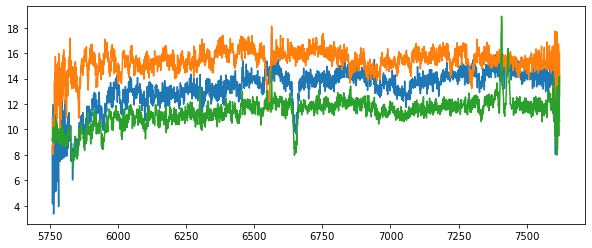

In [266]:
plt.figure(figsize=(10,4))
for i in test:
    plt.plot(wl,flux[i])

In [267]:
flux = flux[test]
ivar = ivar[test]
z = zcat[test]["Z"]

In [268]:
def normalize(flux,ivar):
    norm = np.nanmedian(flux,axis=1, keepdims=True)
    flux = flux/norm
    ivar = ivar*norm**2
    
    return ivar, flux

In [269]:
# z_in = z[:,np.newaxis]
# z_out=0
# z_out = np.atleast_1d(z_out)
# # flux_new = _redshift(flux, z_in, z_out, "flux")
# # wave_new = _redshift(wl, z_in, z_out, "wave")
# # ivar_new = _redshift(ivar, z_in, z_out, "ivar")
# flux_new = flux*(1+z_in)
# wave_new = wl[np.newaxis, :]/(1+z_in)
# # ivar_new = _redshift(ivar, z_in, z_out, "ivar")

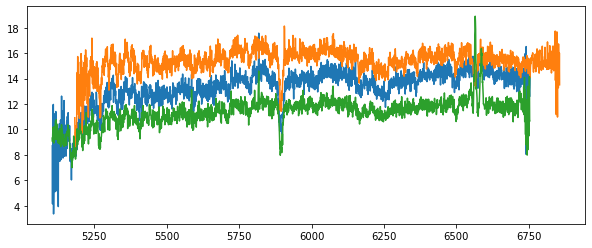

In [270]:
plt.figure(figsize=(10,4))
for i in range(3):
    plt.plot(wl/(1+z[i]), flux[i])
# plt.xlim(5000, 7000)
# plt.axvline(5896)

In [272]:
new_f,new_i,new_wl = _common_grid(flux, wl, ivar, z, z_out=0.0, wave_grid=None)

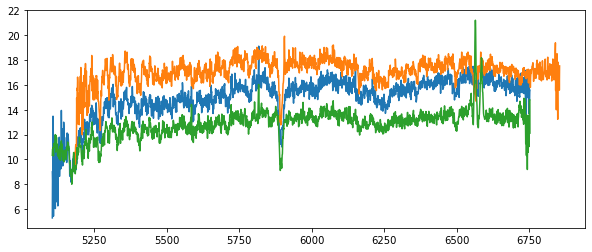

In [273]:
plt.figure(figsize=(10,4))
for i in range(3):
    plt.plot(new_wl, new_f[i])

In [274]:
new_i,new_f = normalize(new_f,new_i)

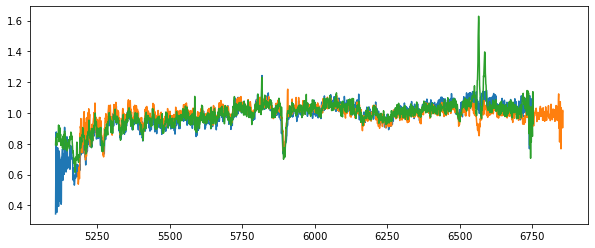

In [275]:
plt.figure(figsize=(10,4))
for i in range(3):
    plt.plot(new_wl, new_f[i])

In [276]:
# def wavg(flux,ivar):
#     num = np.nansum(flux*ivar,axis=0)
#     denom = np.nansum(ivar,axis=0)
#     avg = num/denom
    
#     return(avg)
def wavg(flux,ivar):
    num = np.nansum(flux,axis=0)
    denom = np.sum(np.isfinite(flux),axis=0)
    avg = num/denom
    
    return(avg)

In [277]:
wavg_f = wavg(new_f,new_i)

<ipython-input-276-bca7cde5fd8a>:10: RuntimeWarning: invalid value encountered in true_divide
  avg = num/denom


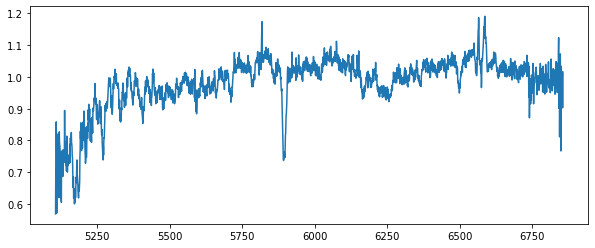

In [279]:
plt.figure(figsize=(10,4))
plt.plot(new_wl,wavg_f)

In [234]:
# index =1
p = figure(title="Spectra", x_axis_label='Wavelength', y_axis_label='Flux', plot_width=1000, plot_height=300, 
           y_range=(-1, 3)
          )
p.line(new_wl, wavg_f, legend_label="Temp.", line_width=2)
p.line(new_wl, convolve(wavg_f,Gaussian1DKernel(3)), legend_label="Temp.", line_width=2, color="orange")

show(p)

In [ ]:
save(p, "plot.html")